# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('./data/human_body_temperature.csv')
print(df.shape)
df.head(3)

(130, 3)


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0


### 1.Is the distribution of body temperatures normal?

Ans: Based on the following distribution plot, the body temperatures are very closed to the Normally distributed (Line in Red Color) by comparing the Normally distributed fitting curve (Line in Black Color). I would propose to collect more data to determine the distribution of body temperatures.

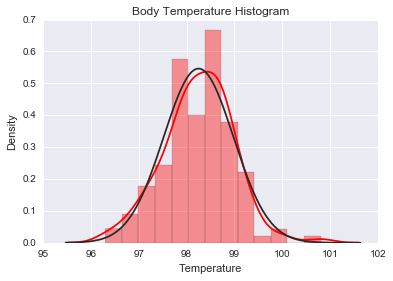

In [3]:
from scipy.stats import norm
ax = sns.distplot(df.temperature,  color="r", fit=norm);
ax.set_title("Body Temperature Histogram")
ax.set_ylabel("Density")
ax.set_xlabel("Temperature")
plt.show()

### 2.Is the sample size large? Are the observations independent?

* The sample size is not large, but it is large enough make inference to to outcome. 
* Yes, the observations are indepenent because one obersvation's temperature does not affect other observations' heart rate

### 3.Is the true population mean really 98.6 degrees F?

Running **Bootstrap Hypothesis** Testing from the Sample Data to find out if we can agree on the True population mean 98.6F

Step 1. Set Hypothesis (mu = population mean (98.6F), Xs = sample mean)
    - Null Hypothesis H0:  mu = Xs
    - Alt. Hypothesis Ha: mu <> Xs
    
Step 2. Set Significance level = 5%

Step 3. Find out the test statistics by calculating the Sample Mean and Sample Standard Deviation

Step 4. Find the observed value (P-value) of test statistic to see whether reject Null Hypothesis

Ans: Based on the following Bootstrapping experiment result, we shall reject the Null Hypothesis (mu = Xs) because the 98.6F does not fall into the 5% confidence interval of this test. So that we have strong evidence to reject the Null Hypothesis. 

In [107]:
np.sqrt(4)

2.0

In [109]:
import random
tempLst = np.array(list(df.temperature)) #Convert the temperature list to numpy array
print(np.mean(tempLst))
bLst=[]
cnt=0
while cnt < 100000:# Sampling 100000 times
    #Calculate and Store the every Mean value of Sampling Trail
    meanValue = np.mean(np.random.choice(tempLst, replace=True, size = len(tempLst)))
    bLst.append(meanValue)
    cnt+=1
print("Number of Samples per Trail (Degree of Freedom:):", len(tempLst))
print("t-statistic (from table):", 1.984)
print("Mean of Bootstrapped Samples:",np.mean(bLst))
print("Std of Bootstrapped Samples:",np.std(bLst))
print("Confidence Interval is %0.3f - %0.3f"%(np.mean(bLst)-(np.std(bLst) * 1.984/ np.sqrt(len(bLst))), np.mean(bLst)+(np.std(bLst) * 1.984 / np.sqrt(len(bLst)))))

98.2492307692
Number of Samples per Trail (Degree of Freedom:): 130
t-statistic (from table): 1.984
Mean of Bootstrapped Samples: 98.2495606462
Std of Bootstrapped Samples: 0.0641632084861
Confidence Interval is 98.249 - 98.250


**frequentist statistical testing : One-Sample**

Ans:
Since we only have one set of data to test on a value, so that I propose to use one-sample test. In addition, the population standard deviation is not provided for this question, I would suggest to use the t-statistic to tackle this question

According to the following caculation, we have evidence to reject the Null Hypothesis. 98.6F doesn't fall in the confidence Interval of this t-test. To further determining the True Mean, I would suggest to increase the number of samples (ONLY 130 data points provide).

In [117]:
tempLst = np.array(list(df.temperature)) #Convert the temperature list to numpy array
print("Number of Samples per Trail (Degree of Freedom:):", len(tempLst))
print("t-statistic (from table):", 1.984)
print("Mean of Bootstrapped Samples:",np.mean(tempLst))
print("Std of Bootstrapped Samples:",np.std(tempLst))
print("Confidence Interval is %0.3f - %0.3f"%(np.mean(tempLst)-(np.std(tempLst) * 1.984/ np.sqrt(len(tempLst))), np.mean(tempLst)+(np.std(tempLst) * 1.984 / np.sqrt(len(tempLst)))))

Number of Samples per Trail (Degree of Freedom:): 130
t-statistic (from table): 1.984
Mean of Bootstrapped Samples: 98.2492307692
Std of Bootstrapped Samples: 0.730357778905
Confidence Interval is 98.122 - 98.376


### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

Ans:
Comparing the result from part 3, the confidence interval is wider by taking only 10 samples. In this case, we still reject the Null Hypothesis. As mentioned, I propose to the sampling size for this test. I would notice that the z statistic would be used when the population standard deviation is known and t-statistic could be used when we have good sampling size.

In [132]:
Lst10 = np.random.choice(tempLst, replace=True, size = 10)
print("Number of Samples per Trail (Degree of Freedom:):", len(Lst10))
print("t-statistic (from table):", 2.262)
print("Mean of Bootstrapped Samples:",np.mean(Lst10))
print("Std of Bootstrapped Samples:",np.std(Lst10)/ np.sqrt(len(bLst)))
print("Confidence Interval is %0.3f - %0.3f"%(np.mean(Lst10)-(np.std(Lst10) * 2.262/ np.sqrt(len(Lst10))), np.mean(Lst10)+(np.std(Lst10) * 2.262 / np.sqrt(len(Lst10)))))


Number of Samples per Trail (Degree of Freedom:): 10
t-statistic (from table): 2.262
Mean of Bootstrapped Samples: 97.99
Std of Bootstrapped Samples: 0.00168789810119
Confidence Interval is 97.608 - 98.372


### 5. At what temperature should we consider someone's temperature to be "abnormal"?

**Bootstrap Approach**

Ans:
Based on the following calculation, temperature outside the range of 98.249 - 98.252 would be considered as abnormal.

In [146]:
tempLst = np.array(list(df.temperature)) #Convert the temperature list to numpy array
print(np.mean(tempLst))
bLst=[]
cnt=0
while cnt < 100000:# Sampling 100000 times
    #Calculate and Store the every Mean value of Sampling Trail
    meanValue = np.mean(np.random.choice(tempLst, replace=True, size = 10))
    bLst.append(meanValue)
    cnt+=1
print("Number of Samples per Trail (Degree of Freedom:):", len(tempLst))
print("t-statistic (from table):", 2.262)
print("Mean of Bootstrapped Samples:",np.mean(bLst))
print("Std of Bootstrapped Samples:",np.std(bLst) / np.sqrt(len(bLst)))
print("Margin of error: ", np.std(bLst) * 2.262/ np.sqrt(len(bLst)))
print("Confidence Interval is %0.3f - %0.3f"%(np.mean(bLst)-(np.std(bLst) * 2.262/ np.sqrt(len(bLst))), np.mean(bLst)+(np.std(bLst) * 2.262 / np.sqrt(len(bLst)))))


98.2492307692
Number of Samples per Trail (Degree of Freedom:): 130
t-statistic (from table): 2.262
Mean of Bootstrapped Samples: 98.2502216
Std of Bootstrapped Samples: 0.000728020198164
Margin of error:  0.00164678168825
Confidence Interval is 98.249 - 98.252


**frequentist statistical testing**

Ans: Based on the following calculation, temperature outside the range of 97.884 - 98.756 would be considered as abnormal.

In [143]:
Lst10 = np.random.choice(tempLst, replace=True, size = 10)
print("Number of Samples per Trail (Degree of Freedom:):", len(Lst10))
print("t-statistic (from table):", 2.262)
print("Mean of Bootstrapped Samples:",np.mean(Lst10))
print("Std of Bootstrapped Samples:",np.std(Lst10)/ np.sqrt(len(Lst10)))
print("Margin of error: ", np.std(Lst10) * 2.262/ np.sqrt(len(Lst10)))
print("Confidence Interval is %0.3f - %0.3f"%(np.mean(Lst10)-(np.std(Lst10) * 2.262/ np.sqrt(len(Lst10))), np.mean(Lst10)+(np.std(Lst10) * 2.262 / np.sqrt(len(Lst10)))))

Number of Samples per Trail (Degree of Freedom:): 10
t-statistic (from table): 2.262
Mean of Bootstrapped Samples: 98.32
Std of Bootstrapped Samples: 0.19276929216
margin of error:  0.436044138867
Confidence Interval is 97.884 - 98.756


### 5. Is there a significant difference between males and females in normal temperature?

**First of all, we have to set up the Hypothesis for this test:**

- temp of male = tm
- temp of female = tf

**Null H0: tm = tf**

**Alt Ha: tm <> tf**

In [188]:
m_temp = np.array(list(df["temperature"][df.gender == "M"]))
f_temp = np.array(list(df["temperature"][df.gender == "F"]))
print("Number of Samples: Male = %d, Female = %d" % (len(m_temp), len(f_temp)))

Number of Samples: Male = 65, Female = 65


In [190]:
print("Mean of Temperature: Male= %0.3f, Female = %0.3f"%(m_temp.mean(),f_temp.mean()))
print("Std of Temperature: Male= %0.3f, Female = %0.3f"%(m_temp.std(),f_temp.std()))
print("Male Temperature: 95Percent C.I.: %0.3f - %0.3f "%(m_temp.mean()-(1.96*m_temp.std()/np.sqrt(65)), m_temp.mean()+(1.96*m_temp.std()/np.sqrt(65))))
print("Female Temperature: 95Percent C.I.: %0.3f - %0.3f "%(f_temp.mean()-(1.96*f_temp.std()/np.sqrt(56)), f_temp.mean()+(1.96*f_temp.std()/np.sqrt(65))))


Mean of Temperature: Male= 98.105, Female = 98.394
Std of Temperature: Male= 0.693, Female = 0.738
Male Temperature: 95Percent C.I.: 97.936 - 98.273 
Female Temperature: 95Percent C.I.: 98.201 - 98.573 


** Based on the above, the mean and standard deviation of Male and Female Temperatures are differ from each other, so that we are going to conduct a 2-sample t-test to verify are significant difference from each other **

In [193]:
#Calculate the t-test statistics and p-value for testing set
from scipy import stats
t_stat, p_value = stats.ttest_ind(m_temp,f_temp,equal_var = False,)
print("")
print("Testing Set: t_statistic is %0.3f and p-value is %0.6f"% (t_stat, p_value))


Testing Set: t_statistic is -2.285 and p-value is 0.023938


**According to the above , the p-value is less than 2.5% of 2 tail test which means that we have strong evidence to believe that we could reject the Null Hypothesis (tm = tf). In other words, the Male temperature is significantly different from the Female temperature**